Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("loan_prediction.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


load the data sets

In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

above is the list of all columns.

In [4]:
df.shape

(614, 13)

our datasets ha 614 rows and 13 columns 

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Our dataset contains obejct and integer both type of data.

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see, we have null values in some of the columns. Let's see the same thing with help of heatmap:

<AxesSubplot:>

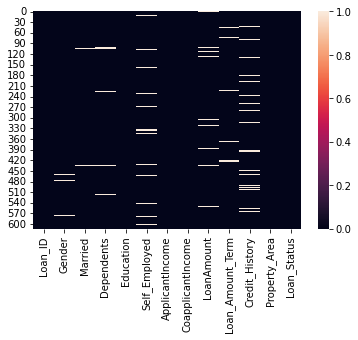

In [7]:
sns.heatmap(df.isnull())

Before proceeding ahead lets fill the null values:

In [8]:
#lets replace categorical columns first
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [9]:
#lets replace missing values for numerical columns
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [10]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [11]:
cat_col=[]
for i in df:
    if df[i].nunique() <= 4:
        cat_col.append(i)
        
print(cat_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']


Above is the list of columns which has number of unique values not more than 4.

# Let's do Visualization:

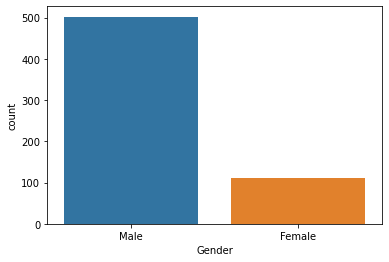

In [12]:
plt.figure()
sns.countplot(df["Gender"])
plt.show()

above figure male has higher than female

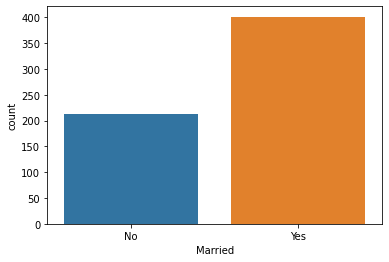

In [13]:
plt.figure()
sns.countplot(df["Married"])
plt.show()

unmaried person is lower than married person

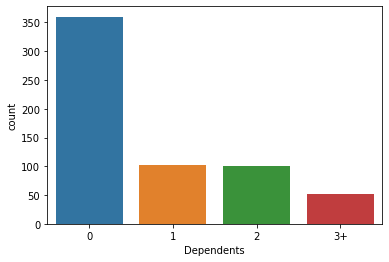

In [14]:
plt.figure()
sns.countplot(df["Dependents"])
plt.show()

"0" dependents percentage is higher than rest others

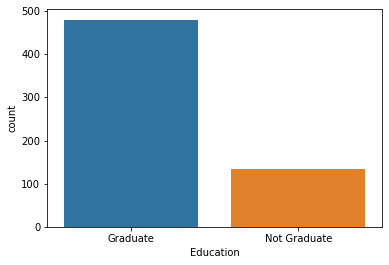

In [15]:
plt.figure()
sns.countplot(df["Education"])
plt.show()

almost 500 peoples are graduate

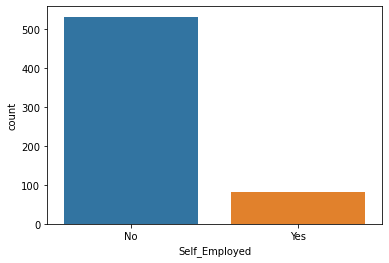

In [16]:
plt.figure()
sns.countplot(df["Self_Employed"])
plt.show()

maximum peoples are not employed

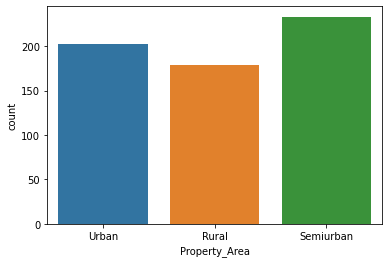

In [17]:
plt.figure()
sns.countplot(df["Property_Area"])
plt.show()

semiurban is greater than rest of them

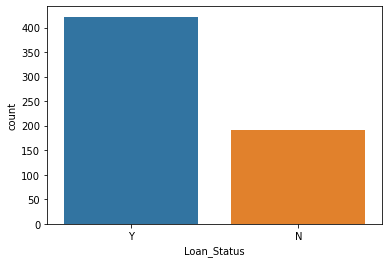

In [18]:
plt.figure()
sns.countplot(df["Loan_Status"])
plt.show()

loan status is our target columns , these column are not balanced . we need to balance it.

before procceding ahead Lets compare it with our target column:

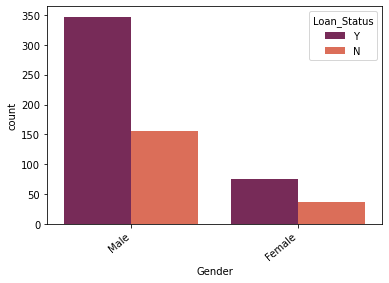

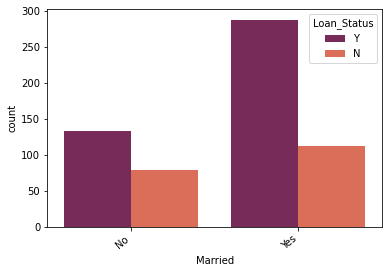

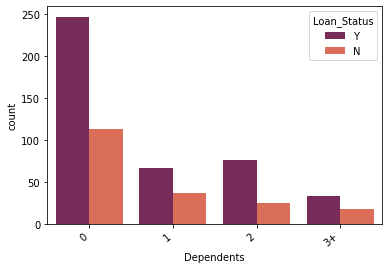

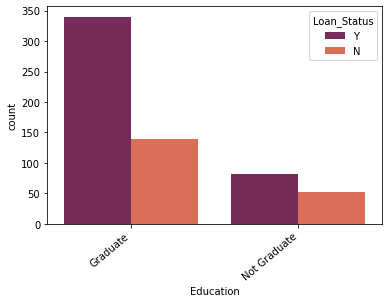

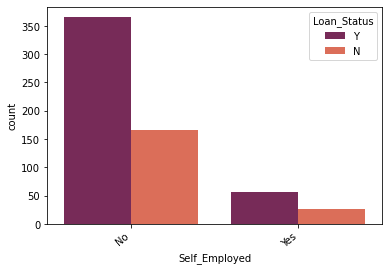

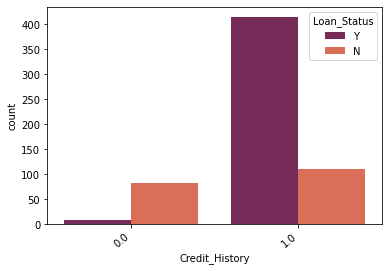

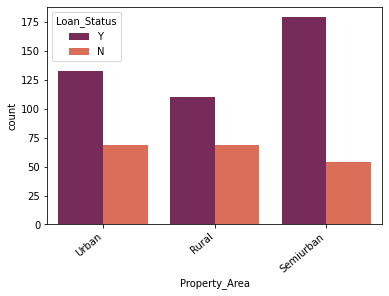

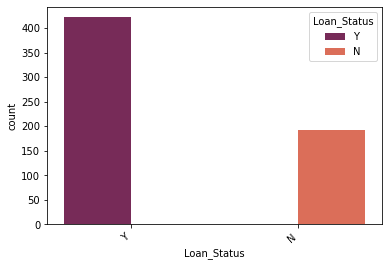

In [19]:
for i in cat_col:
    plt.figure()
    a=sns.countplot(df[i],hue=df['Loan_Status'],palette='rocket')
    a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
    plt.show()

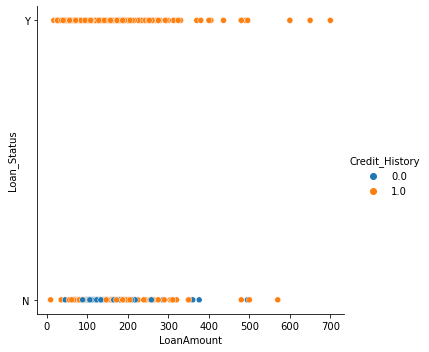

In [20]:
sns.relplot(x='LoanAmount',y='Loan_Status',hue='Credit_History',data=df,kind='scatter')

Loan status is approved for all amount if applicant has credit history.

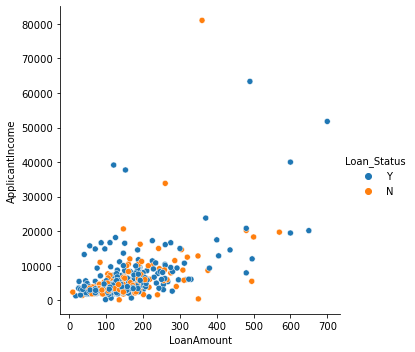

In [21]:
sns.relplot(x='LoanAmount',y='ApplicantIncome',hue='Loan_Status',data=df,kind='scatter')

In [22]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
#added ApplicantIncome and CoapplicantIncome together

In [23]:
#let's drop these two columns first
df.drop('ApplicantIncome', axis=1, inplace=True)
df.drop('CoapplicantIncome', axis=1, inplace=True)

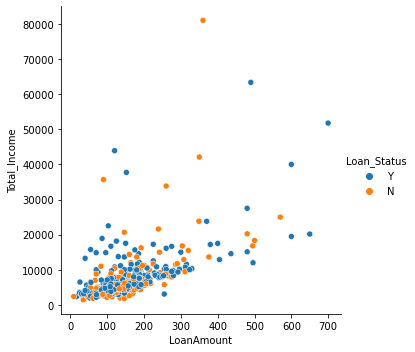

In [24]:
sns.relplot(x='LoanAmount',y='Total_Income',hue='Loan_Status',data=df,kind='scatter')

We can see change the details now as loan amount is approved on the basis of total income of applicant and coapplicant.

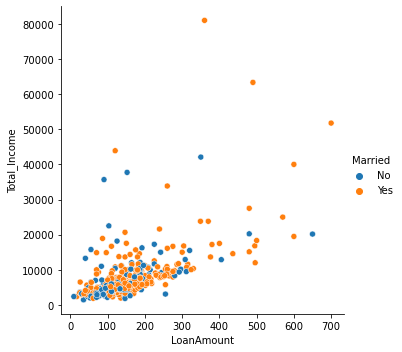

In [25]:
sns.relplot(x='LoanAmount',y='Total_Income',hue='Married',data=df,kind='scatter')

Our dataset has more married people who are applying for loan.

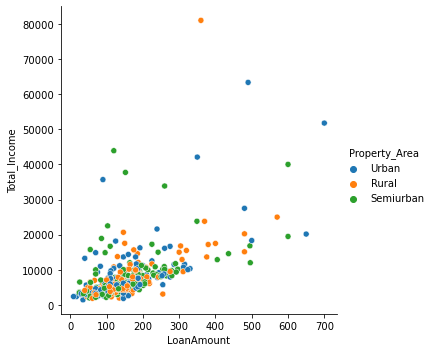

In [26]:
sns.relplot(x='LoanAmount',y='Total_Income',hue='Property_Area',data=df,kind='scatter')

Applicants who has total income of around 20000 are applying for loan amount of around 300-350 for all three property areas.

# Let's do Encoding:

In [27]:
#ordinalEncoder
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [28]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0.0,1.0,0.0,0.0,0.0,0.0,146.412162,360.0,1.0,2.0,1.0,5849.0
1,1.0,1.0,1.0,1.0,0.0,0.0,128.000000,360.0,1.0,0.0,0.0,6091.0
2,2.0,1.0,1.0,0.0,0.0,1.0,66.000000,360.0,1.0,2.0,1.0,3000.0
3,3.0,1.0,1.0,0.0,1.0,0.0,120.000000,360.0,1.0,2.0,1.0,4941.0
4,4.0,1.0,0.0,0.0,0.0,0.0,141.000000,360.0,1.0,2.0,1.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,71.000000,360.0,1.0,0.0,1.0,2900.0
610,610.0,1.0,1.0,3.0,0.0,0.0,40.000000,180.0,1.0,0.0,1.0,4106.0
611,611.0,1.0,1.0,1.0,0.0,0.0,253.000000,360.0,1.0,2.0,1.0,8312.0
612,612.0,1.0,1.0,2.0,0.0,0.0,187.000000,360.0,1.0,2.0,1.0,7583.0


now we have not any categorical datatypes

# Let's Describe our datasets:

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_ID,614.0,306.500000,177.390811,0.0,153.25,306.5,459.75,613.0
Gender,614.0,0.817590,0.386497,0.0,1.00,1.0,1.00,1.0
Married,614.0,0.653094,0.476373,0.0,0.00,1.0,1.00,1.0
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.0,1.00,3.0
Education,614.0,0.218241,0.413389,0.0,0.00,0.0,0.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.0,0.00,0.0,0.00,1.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0
Property_Area,614.0,1.037459,0.787482,0.0,0.00,1.0,2.00,2.0


there is a large difference between 75% and maximum for some columns.so outliers are present in this dataset.lets see its with visualization.

<AxesSubplot:>

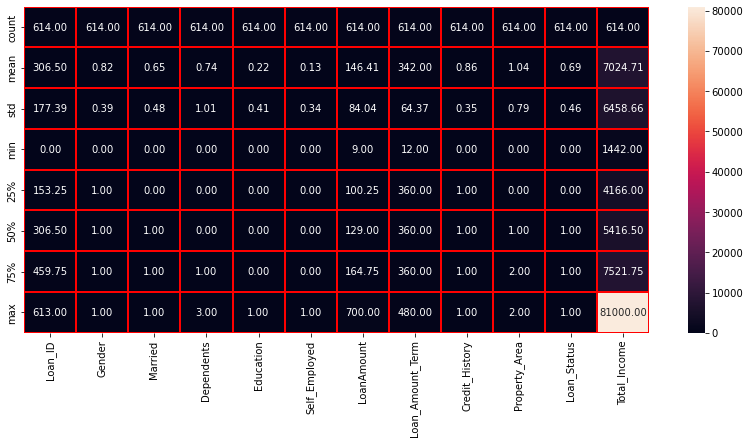

In [30]:
plt.figure(figsize=(14,6))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f")

# Correlation of the columns with target columns:

In [31]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.035684,-0.028945,-0.030603,-0.155416,0.011773,0.033774
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.107930,-0.073567,0.009170,-0.025752,0.017987,0.093191
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.147141,-0.100863,0.010938,0.004257,0.091478,0.083319
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.163106,-0.101054,-0.040160,-0.000244,0.010118,0.125590
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884,-0.161362
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.115260,-0.033943,-0.001550,-0.030860,-0.003700,0.113000
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,1.000000,0.038801,-0.001431,-0.044776,-0.036416,0.620102
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,0.038801,1.000000,0.000432,-0.077620,-0.020974,-0.069830
Credit_History,-0.030603,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.001431,0.000432,1.000000,0.001963,0.540556,-0.012563
Property_Area,-0.155416,-0.025752,0.004257,-0.000244,-0.065243,-0.030860,-0.044776,-0.077620,0.001963,1.000000,0.032112,-0.004218


let's see its with visualization

<AxesSubplot:>

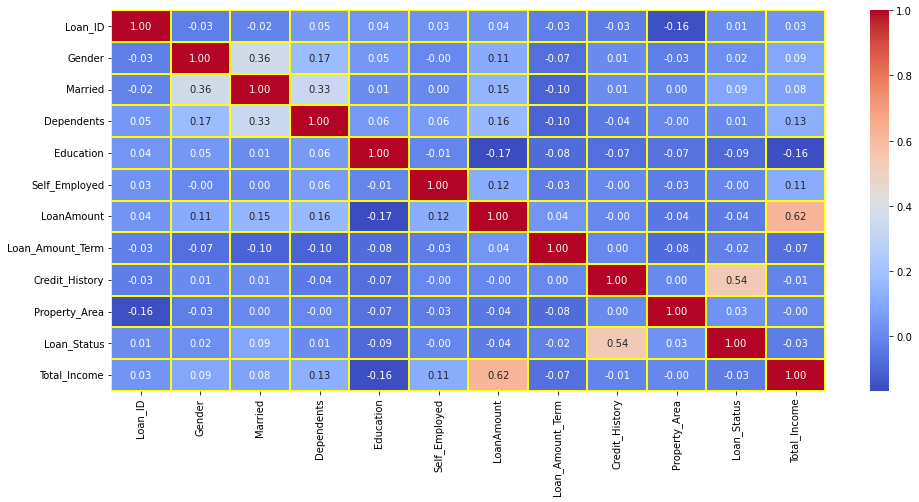

In [32]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="yellow",fmt="0.2f",cmap="coolwarm")

Checking the columns which are positively and negative correlated with the target columns:

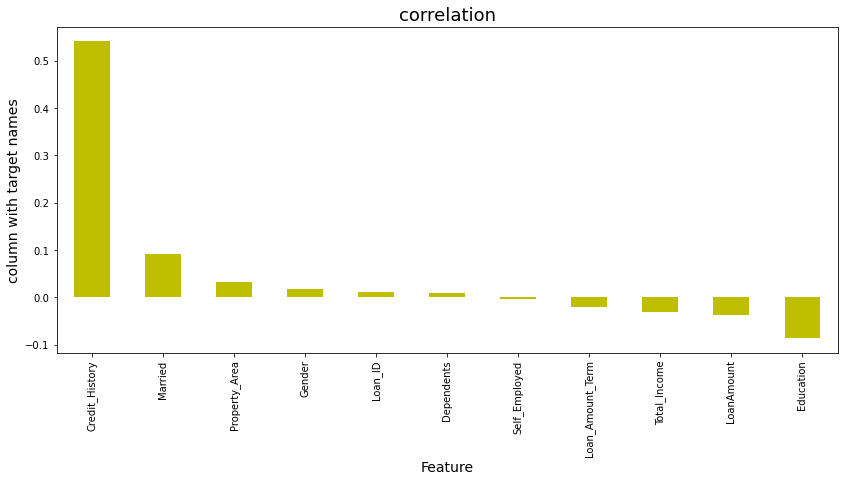

In [33]:
plt.figure(figsize=(14,6))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

self_employed,Dependents and loan Id are the low correlation with each other . so drop this columns.

In [34]:
df.drop('Self_Employed', axis=1, inplace=True)
df.drop('Dependents', axis=1, inplace=True)
df.drop('Loan_ID', axis=1, inplace=True)

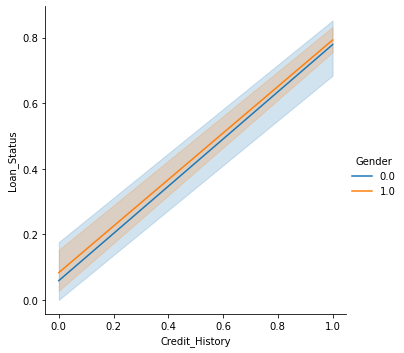

In [35]:
sns.relplot(x='Credit_History',y='Loan_Status',hue='Gender',data=df,kind='line')

Loan Status is approved if applicant has credit history and it applies for both the genders.

<Figure size 1440x720 with 0 Axes>

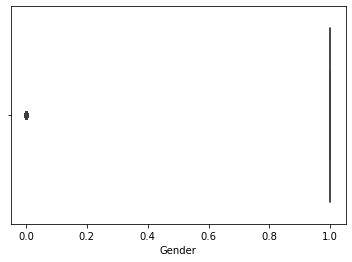

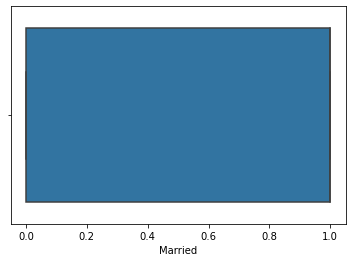

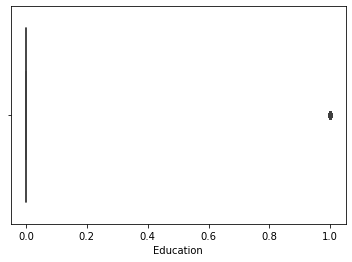

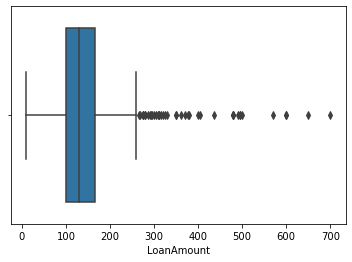

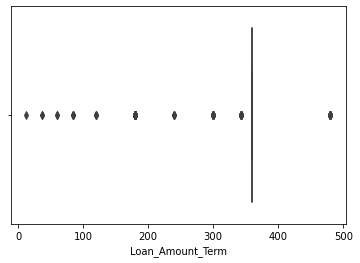

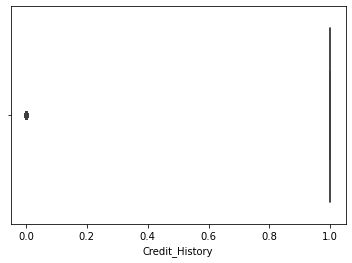

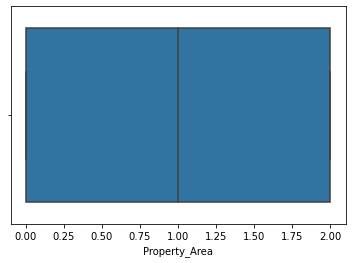

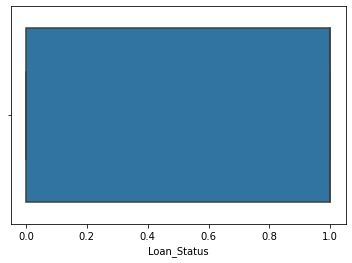

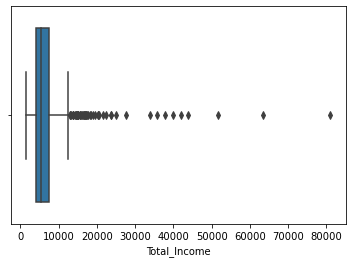

In [36]:
plt.figure(figsize=(20,10))
for i in df.columns:
    plt.figure()
    sns.boxplot(x=df[i])

outlier are present in our datasets

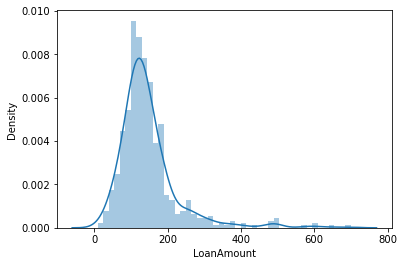

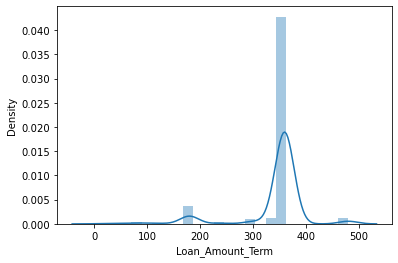

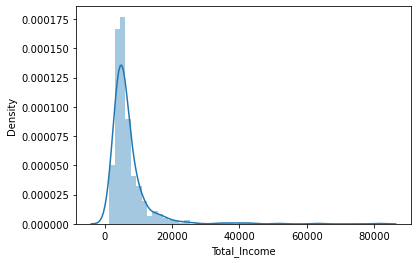

In [37]:
for i in df.columns:
    if df[i].nunique() >= 4:
        plt.figure()
        sns.distplot(df[i],kde=True)

skewness are present in our datasets

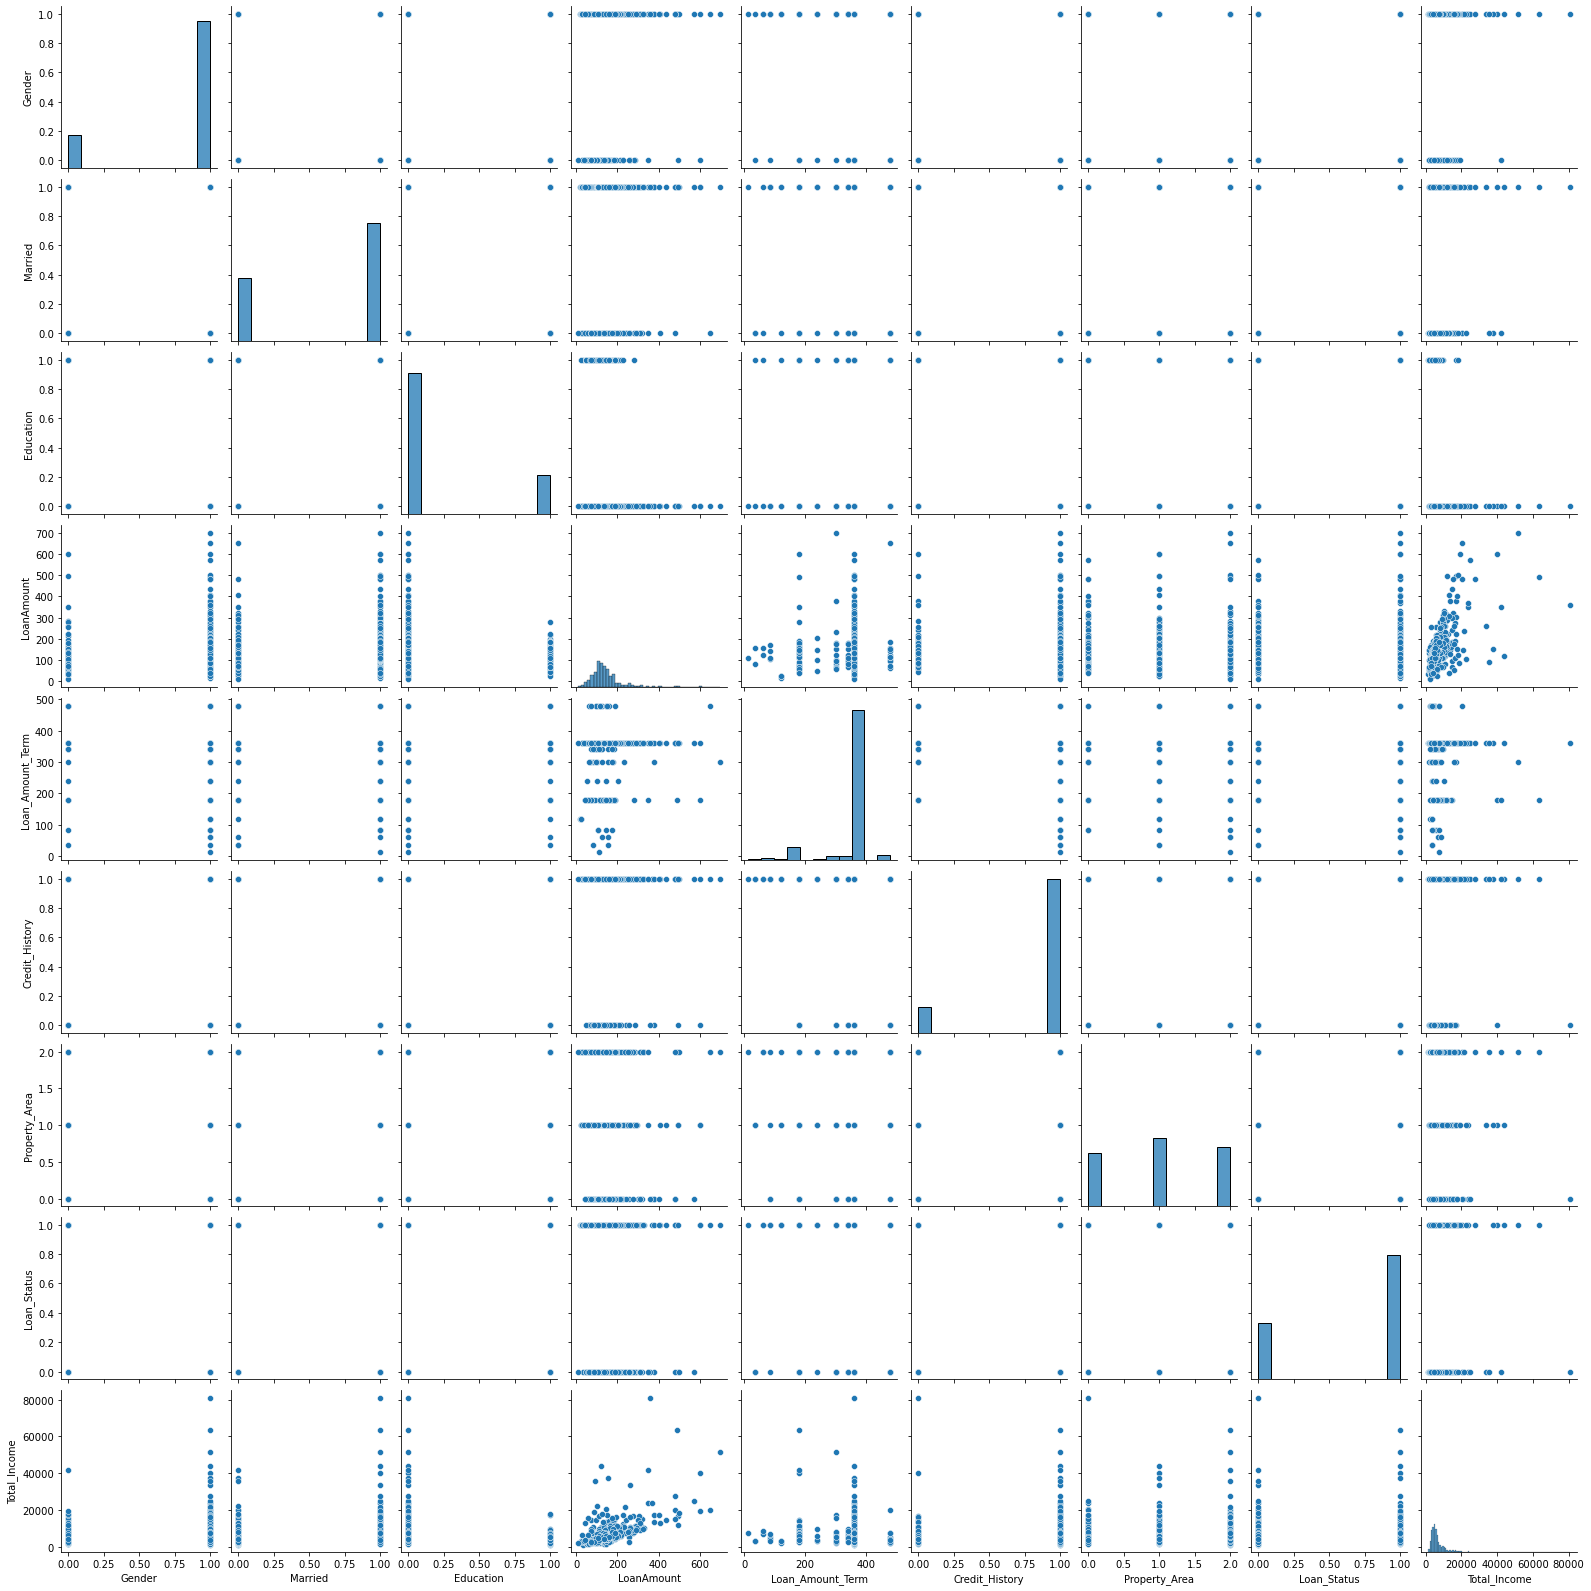

In [38]:
sns.pairplot(df)

We can see positive relation in Total_Income and LoanAmount. In all other columns data is distributed in both side of range .

# Skewness and outliers removal:

In [39]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 14,  68,  94, 130, 133, 155, 155, 171, 171, 177, 183, 185, 242,
        262, 278, 308, 313, 333, 333, 369, 409, 432, 443, 487, 495, 497,
        506, 506, 523, 525, 546, 561, 575, 581, 585, 600, 604], dtype=int64),
 array([4, 4, 4, 3, 4, 3, 8, 3, 8, 3, 8, 8, 4, 4, 3, 3, 4, 3, 8, 3, 8, 3,
        8, 3, 4, 4, 3, 8, 3, 3, 4, 3, 4, 8, 4, 8, 3], dtype=int64))

In [40]:
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1.0,0.0,0.0,146.412162,360.0,1.0,2.0,1.0,5849.0
1,1.0,1.0,0.0,128.000000,360.0,1.0,0.0,0.0,6091.0
2,1.0,1.0,0.0,66.000000,360.0,1.0,2.0,1.0,3000.0
3,1.0,1.0,1.0,120.000000,360.0,1.0,2.0,1.0,4941.0
4,1.0,0.0,0.0,141.000000,360.0,1.0,2.0,1.0,6000.0
...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,71.000000,360.0,1.0,0.0,1.0,2900.0
610,1.0,1.0,0.0,40.000000,180.0,1.0,0.0,1.0,4106.0
611,1.0,1.0,0.0,253.000000,360.0,1.0,2.0,1.0,8312.0
612,1.0,1.0,0.0,187.000000,360.0,1.0,2.0,1.0,7583.0


now removing all outliers

In [41]:
df_new.shape

(581, 9)

In [42]:
df.shape

(614, 9)

In [43]:
loss_percentage=((614-581)/614)*100
loss_percentage

5.374592833876222

we have 5.37 percentage data loss for removing outliers

In [44]:
x=df_new.drop('Loan_Status', axis=1)
y=df_new['Loan_Status']
print(x.shape)
print(y.shape)

(581, 8)
(581,)


x stands for features column and y stands for target columns.

In [45]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)


In [46]:
df_new.skew()

Gender             -1.633836
Married            -0.633385
Education           1.317262
LoanAmount          0.047111
Loan_Amount_Term    0.725772
Credit_History     -1.987444
Property_Area      -0.154841
Total_Income       -0.007379
dtype: float64

Keeping +/-0.5 as the range for skewness.gender,education are categorical datasets, so no need to remove skewness them. rest of columns has been reduce skewness .

# Let's perform scaling now:

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(df_new)

array([[ 0.47511935, -1.36457648, -0.53954714, ...,  0.41681815,
         1.19584013,  0.18653867],
       [ 0.47511935,  0.73282811, -0.53954714, ...,  0.41681815,
        -1.34086109,  0.27379445],
       [ 0.47511935,  0.73282811, -0.53954714, ...,  0.41681815,
         1.19584013, -1.4073319 ],
       ...,
       [ 0.47511935,  0.73282811, -0.53954714, ...,  0.41681815,
         1.19584013,  0.91005199],
       [ 0.47511935,  0.73282811, -0.53954714, ...,  0.41681815,
         1.19584013,  0.72809168],
       [-2.10473432, -1.36457648, -0.53954714, ..., -2.39912775,
         0.01560951, -0.36051983]])

In [48]:
x=df_new

# class imbalancement:

In [49]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=4)
x,y=oversample.fit_resample(x,y)

In [50]:
y.value_counts()

1.0    400
0.0    400
Name: Loan_Status, dtype: int64

now our target columns is balanced

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [52]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    DTC=DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred=DTC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, " on Random State ",maxRS)

Best accuracy is  0.81875  on Random State  89


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [54]:
model=[DecisionTreeClassifier(),SVC(),AdaBoostClassifier(),RandomForestClassifier(),LogisticRegression()]

for m in model:
    m.fit(x_train,y_train)
    #m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy Score of',m,'is:', acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('\n')

Accuracy Score of DecisionTreeClassifier() is: 0.825
[[71 13]
 [15 61]]
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84        84
         1.0       0.82      0.80      0.81        76

    accuracy                           0.82       160
   macro avg       0.82      0.82      0.82       160
weighted avg       0.82      0.82      0.82       160



Accuracy Score of SVC() is: 0.75625
[[55 29]
 [10 66]]
              precision    recall  f1-score   support

         0.0       0.85      0.65      0.74        84
         1.0       0.69      0.87      0.77        76

    accuracy                           0.76       160
   macro avg       0.77      0.76      0.76       160
weighted avg       0.77      0.76      0.75       160



Accuracy Score of AdaBoostClassifier() is: 0.75
[[60 24]
 [16 60]]
              precision    recall  f1-score   support

         0.0       0.79      0.71      0.75        84
         1.0       0.71      0.79      

Accuracy for DecisionTreeClassifier is 82.5%, for SVC its 75.62% and for AdaBoostClassifier its 75% and for RandomForestClassifier its 81.87% and for Logisticregressionis 77.50%

# Cross Validation:

In [55]:
model=[DecisionTreeClassifier(),SVC(),AdaBoostClassifier(),RandomForestClassifier(),LogisticRegression()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print("Score for ",m," is : ",score.mean())

Score for  DecisionTreeClassifier()  is :  0.72875
Score for  SVC()  is :  0.7274999999999999
Score for  AdaBoostClassifier()  is :  0.7162499999999999
Score for  RandomForestClassifier()  is :  0.7987500000000001
Score for  LogisticRegression()  is :  0.70625


With RandomForestClassifier model there is very less difference in accuracy and cross validation score, Hence the best model is RandomForestClassifier.

# AUC-ROC CURVE:

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [58]:
model=[AdaBoostClassifier(),RandomForestClassifier(),LogisticRegression(),SVC(probability=True)]
for m in model:
    m.fit(x_train,y_train)
    y_pred_prob=m.predict_proba(x_test)[:,1]    
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print('AUC Score of', m)
    print(auc_score)
    print('\n')

AUC Score of AdaBoostClassifier()
0.7518796992481203


AUC Score of RandomForestClassifier()
0.818609022556391


AUC Score of LogisticRegression()
0.7832080200501252


AUC Score of SVC(probability=True)
0.7615914786967419




as we can see that the AUC score of RandomForestClassifier is best. now we are Plotting roc_auc curve with the help of TPR(TRUE POSITIVE RATE) & FPR(FALSE POSITIVE RATE)

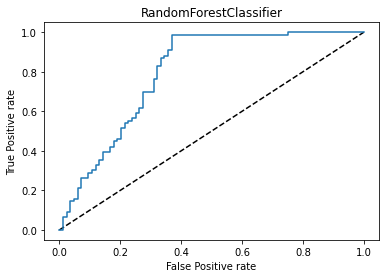

In [59]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('RandomForestClassifier')
plt.show()

# Hyperparameter Training:

In [60]:
from sklearn.model_selection import GridSearchCV

In [62]:
parameters={"n_estimators":[100,200,300],
           "criterion":["gini","entropy"],
           "max_depth":[1,2,3],
           "min_samples_split":[1,2,3]}

In [63]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [64]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 200, 300]})

In [65]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [66]:
Final_mod= RandomForestClassifier(criterion="gini",max_depth=2,min_samples_split=3,n_estimators=100)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

78.125


after hyperparameter training ,we are getting best accuracy which is 78.12%

# Saving the best Model:

In [68]:
import pickle
filename= 'Loan_best_model.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))

# Conclusion:

In [69]:
#load the model from the disk

loaded_model = pickle.load(open('Loan_best_model.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.78125


In [70]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Orginal"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
Predicted,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
Orginal,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [71]:
#end